___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

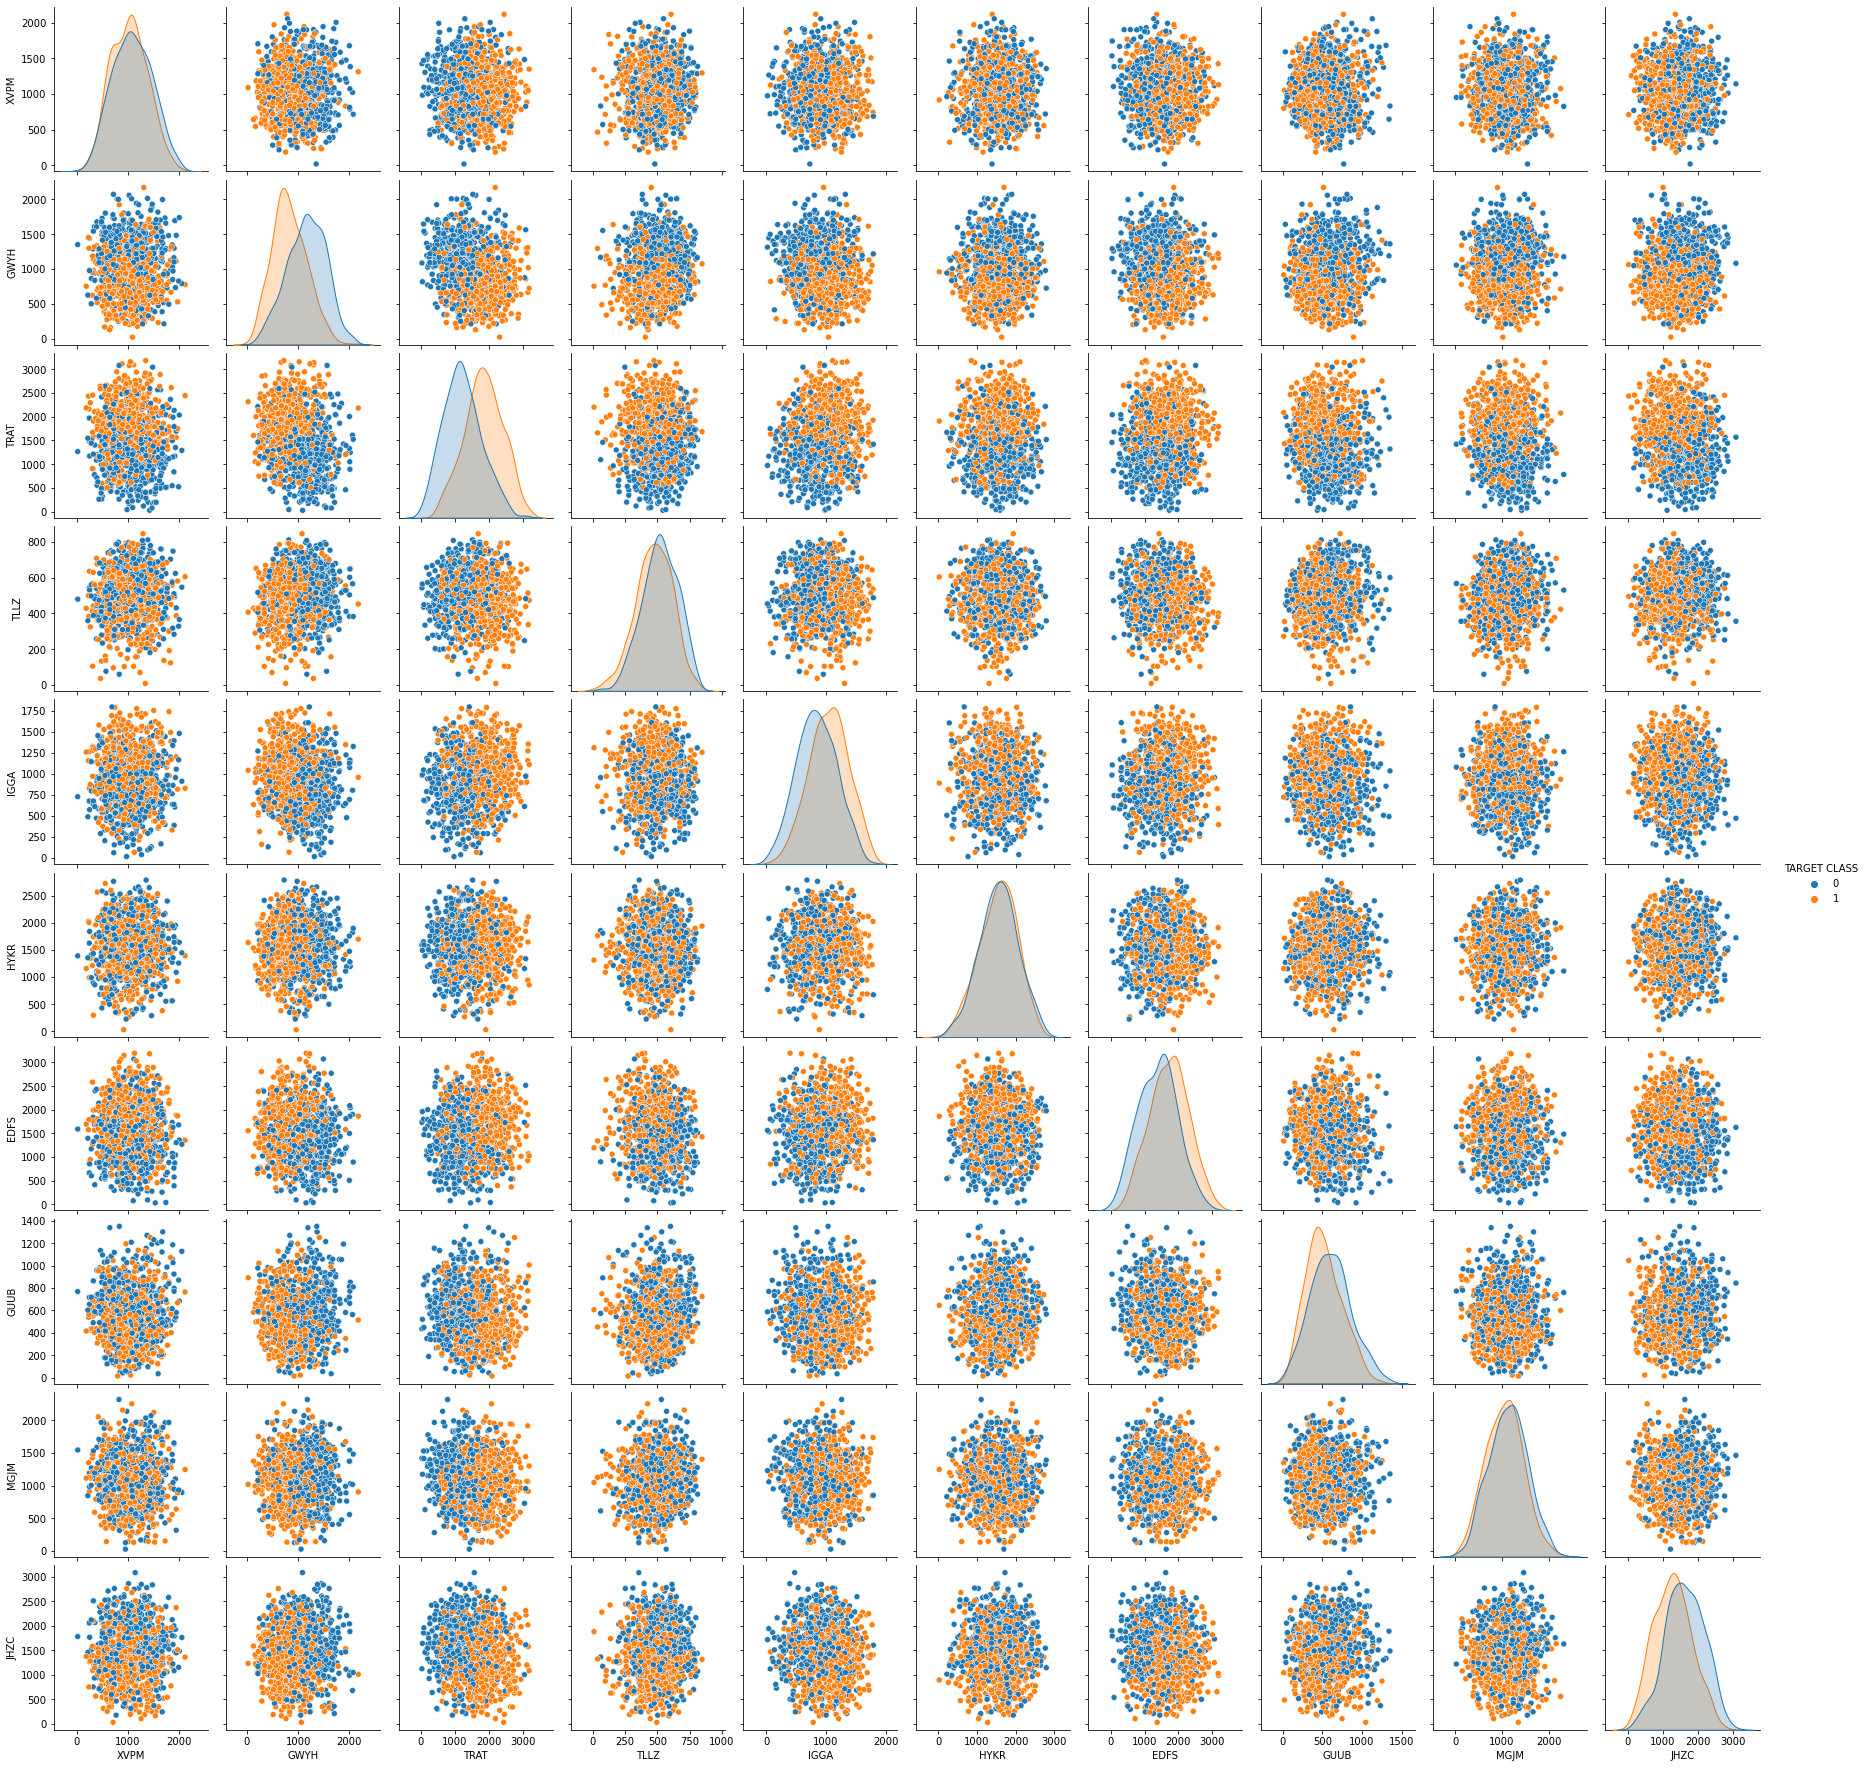

In [4]:
sns.pairplot(data=df, hue='TARGET CLASS')

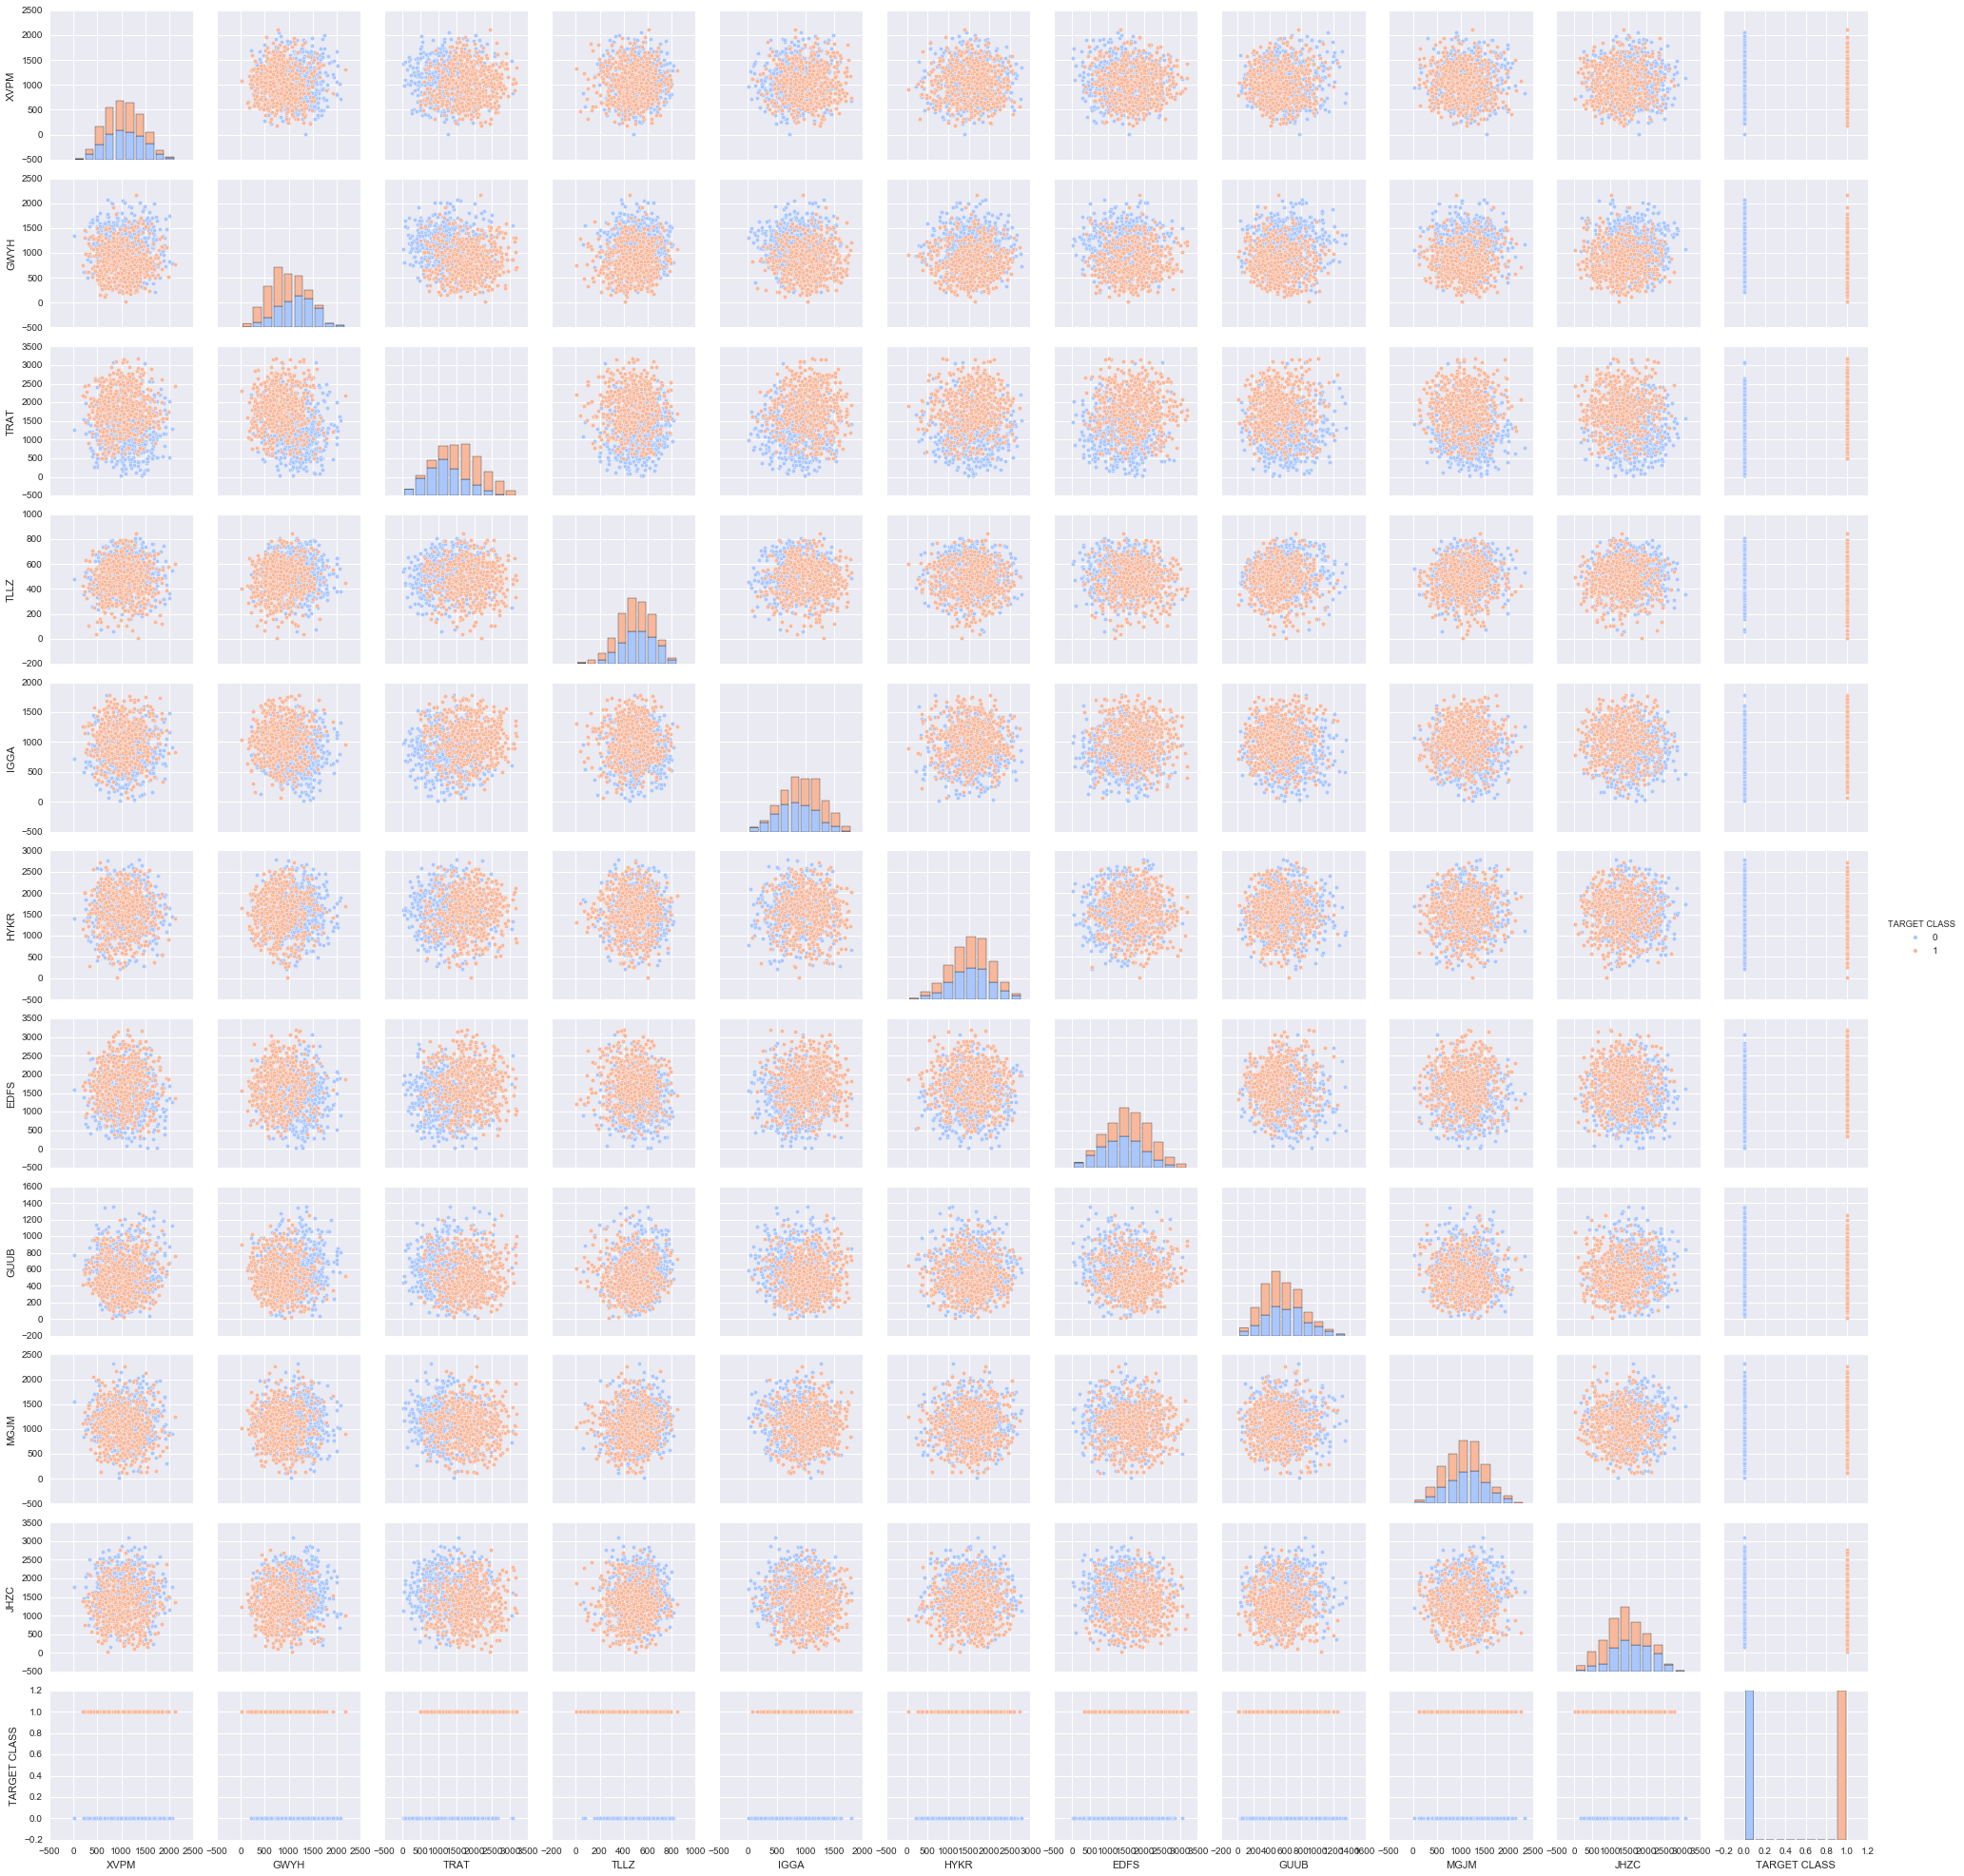

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [16]:
df.iloc[:,:-1]

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0    1636.670614   817.988525  2565.995189  358.347163   550.417491   
1    1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2    1300.035501   820.518697  2025.854469  525.562292   922.206261   
3    1059.347542  1066.866418   612.000041  480.827789   419.467495   
4    1018.340526  1313.679056   950.622661  724.742174   843.065903   
..           ...          ...          ...         ...          ...   
995  1343.060600  1289.142057   407.307449  567.564764  1000.953905   
996   938.847057  1142.884331  2096.064295  483.242220   522.755771   
997   921.994822   607.996901  2065.482529  497.107790   457.430427   
998  1157.069348   602.749160  1548.809995  646.809528  1335.737820   
999  1287.150025  1303.600085  2247.287535  664.362479  1132.682562   

            HYKR         EDFS        GUUB         MGJM         JHZC  
0    1618.870897  2147.641254  330.727893  1494.878631   845.136088  
1    2084.107872   853.404981  447.157619  1193.032521   861.081809  
2    2552.355407   818.676686  845.491492  1968.367513  1647.186291  
3     685.666983   852.867810  341.664784  1154.391368  1450.935357  
4    1370.554164   905.469453  658.118202   539.459350  1899.850792  
..           ...          ...         ...          ...          ...  
995   919.602401   485.269059  668.007397  1124.772996  2127.628290  
996  1703.169782  2007.548635  533.514816   379.264597   567.200545  
997  1577.506205  1659.197738  186.854577   978.340107  1943.304912  
998  1455.504390  2788.366441  552.388107  1264.818079  1331.879020  
999   991.774941  2007.676371  251.916948   846.167511   952.895751  

[1000 rows x 10 columns]

In [20]:
scaler.fit(X=df.iloc[:,:-1])

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [21]:
scaled = scaler.transform(df.iloc[:,:-1])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [25]:
df.columns[:-1]

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [26]:
scaled_df = pd.DataFrame(scaled, columns=df.columns[:-1])

In [27]:
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [28]:
from sklearn.model_selection import train_test_split

In [33]:
scaled_df

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

In [35]:
X=scaled_df
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
521  1.255561 -0.564244 -2.075627 -0.348013  0.624485  0.794511  0.737185   
737  0.384099  2.081396  0.521322  0.979205  0.273135  0.801293  0.604900   
740  0.045766 -0.963995 -0.063855 -0.255850  0.024667  0.187754  0.711768   
660  0.091750  0.345222  0.025211  1.295108  0.516380 -2.500545 -0.033120   
411  0.757263  1.270762 -1.450158 -1.056888 -0.302822  0.804941  1.090869   
..        ...       ...       ...       ...       ...       ...       ...   
506 -0.551749  0.391010 -1.574793  0.768803 -1.172875  1.301627 -0.181046   
342  1.561740  0.457112 -0.932060  0.605592 -0.825716 -1.758815 -0.595309   
485 -2.012010 -0.940478 -0.972783 -0.583358  0.973721 -0.684057 -0.469676   
711  1.676004  2.566622 -0.304478 -0.783297  0.534680  0.422003 -1.759717   
133 -1.169774 -0.050325  0.945012 -1.695500  0.413365 -1.698864  1.364887   

         GUUB      MGJM      JHZC  
521  1.422212  0.590144  0.670701  
737  0.563517 -0.803573  1.531555  
740 -1.914286 -0.834974  0.561856  
660 -0.878219 -0.386748  0.127079  
411  0.625371 -0.343618  1.882966  
..        ...       ...       ...  
506  0.595411 -0.630529  0.067787  
342 -0.581222  1.862672  0.570700  
485 -0.516680  0.298498  0.231493  
711  0.639146  0.707529 -0.816269  
133  0.191765 -0.038103  1.748514  

[330 rows x 10 columns]

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [44]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(confusion_matrix(y_test,pred))

[[119  44]
 [ 50 117]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [65]:
from sklearn.metrics import accuracy_score 

error_rate = []
for n in range(1,300):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(1-accuracy_score(y_test, pred))

**Now create the following plot using the information from your for loop.**

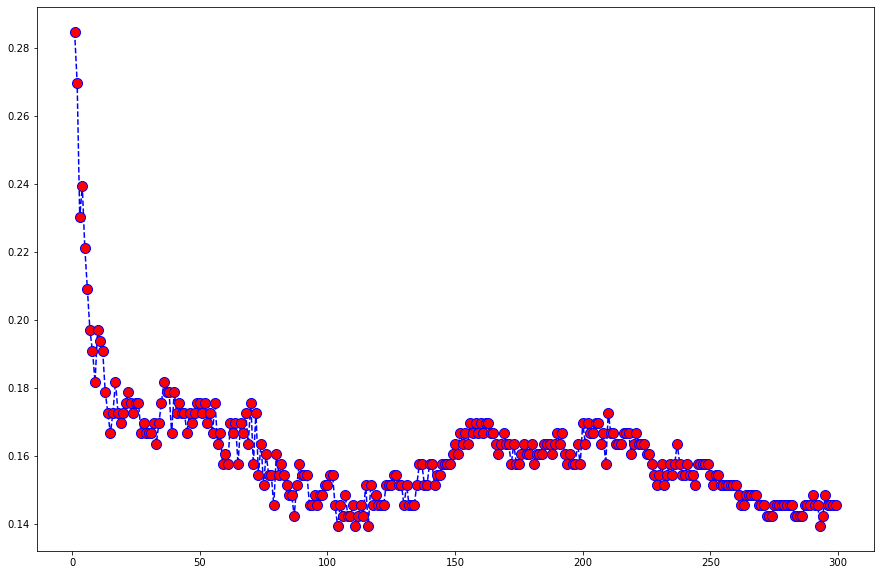

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(range(1,300), error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [62]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('K=16')
print(accuracy_score(y_test,pred))

K=16
0.8272727272727273


In [64]:
knn = KNeighborsClassifier(n_neighbors=87)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('K=87')
print(accuracy_score(y_test,pred))

K=87
0.8575757575757575


# Great Job!